In [1]:
from tensorflow.keras.datasets import cifar10

In [2]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

In [3]:
import matplotlib.pyplot as plt
import matplotlib

In [4]:
import numpy as np
y_train[0]#integers output
np.unique(np.array(y_train))

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [5]:
from tensorflow.keras.utils import to_categorical
y_train=to_categorical(y_train)
y_train.shape

(50000, 10)

(-0.5, 31.5, 31.5, -0.5)

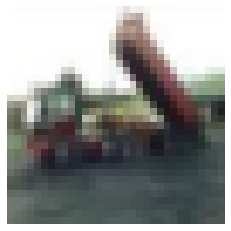

In [6]:
plt.imshow(x_train[2],interpolation="nearest")
plt.axis("off")

In [7]:
from tensorflow.keras import models,layers,initializers
he_init=initializers.VarianceScaling()

In [8]:
from tensorflow.keras import regularizers
l1_l2=regularizers.l1_l2()

In [9]:
model=models.Sequential()

In [10]:
model.add(layers.Conv2D(32,(3,3),activation="relu",input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),strides=2,kernel_regularizer=l1_l2,activation="relu"))
model.add(layers.MaxPooling2D((2,2)))

In [11]:
model.add(layers.Flatten())
model.add(layers.Dense(64,activation="relu",kernel_regularizer=l1_l2,kernel_initializer=he_init))
model.add(layers.Dropout(rate=0.5))      
model.add(layers.Dense(10,activation="relu"))

In [12]:
model.compile(optimizer="rmsprop",loss="categorical_crossentropy",metrics=["accuracy"])

In [13]:
x_val=x_train[:15000]
y_val=y_train[:15000]
x_train_partial=x_train[15000:]
y_train_partial=y_train[15000:]

In [14]:
import tensorflow as tf

In [16]:
with tf.device("/gpu:0"):
    history=model.fit(x_train_partial,y_train_partial,batch_size=128,epochs=20,validation_data=[x_val,y_val],verbose=0)

In [17]:
data=history.history

ValueError: x and y must have same first dimension, but have shapes (10,) and (20,)

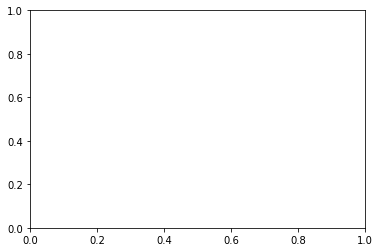

In [18]:
plt.plot(range(1,21),data['accuracy'],label="training_accuracy")
plt.plot(range(1,21),data['loss'],label="training_loss")
plt.legend()

In [ ]:
plt.plot(range(1,11),data['val_accuracy'],label="validation_accuracy")
plt.plot(range(1,11),data['val_loss'],label="validation_loss")
plt.legend()

In [ ]:
model.summary()